In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import numpy as np
import time

In [2]:
start=time.time()

#  1 导入数据

In [3]:
dfnopay=pd.read_csv("DataTech_Credit_Train_Communication1.txt") #用户违约类
dfpred=pd.read_csv("DataTech_Credit_Train_User1.txt")  #题目提供的测试集，需分割训练和测试集合
dfcomm=pd.read_csv("DataTech_公共数据_基础信息1.txt",encoding='utf-8',na_values=['\\N']) #用户基本信息。由于含有中文，需要指定utf-8编码，并指定空值类型
dfcall=pd.read_csv("DataTech_公共数据_通话1.txt",encoding='utf-8',na_values=['\\N']) #用户通话类。由于含有中文，需要指定utf-8编码，并指定空值类型
#dfnet=pd.read_csv("DataTech_公共数据_上网1.txt",encoding='utf-8',na_values=['\\N'])

dfnopay.columns=["USERI_ID","Stop_Days","Stop_Cnt","date"]
dfpred.columns=["USERI_ID","RISK_Flag"]
dfcomm.columns=["USERI_ID", "AGE", "OCCUPATION_ID", "CITY_ID", "COUNTY_ID", "ONLINE_TIME", "REAL_NAME_FLAG", "USER_CREDIT_ID", "CALL_MARK", "COMM_FLAG", "CALL_COUNTS", "VPMN_CALL_COUNTS", "TOLL_COUNTS", "WJ_CALL_COUNTS", "OUT_CALL_COUNTS", "CALLFW_COUNTS", "QQW_CALL_COUNTS", "BD_CALL_COUNTS", "ROAM_COUNTS", "CALL_DURATION_M", "BILL_DURATION_M", "VPMN_CALL_DURATION_M", "WJ_CALL_DURATION_M", "OUT_CALL_DURATION_M", "CALLFW_DURATION_M", "BD_CALL_DURATION_M", "ROAM_DURATION_M", "TOLL_DURATION_M", "QQW_CALL_DURATION_M", "GPRS_VOLUME", "ARPU", "SP_FEE", "TELE_TYPE", "TELE_FAC", "SMART_SYSTEM", "FIST_USE_DATE", "NUM_OF_COMM", "date"]
dfcall.columns=["USERI_ID", "OPP_USER_NUMBER", "START_TIME", "DURATION", "CALL_TYPE", "ROAM_TYPE", "HPLMN1", "HPLMN2", "VPLMN1", "VPLMN2", "OPP_HOME_AREACODE", "TOLL_TYPE", "industry", "serv_type"]
#dfnet.columns=["USERI_ID", "TIME_FRAME", "FIRST_DOMAIN_NAME", "APP_NAME", "APP_CLASSIFY_TYPE"]

/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (1,9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
dfpred.head()

,USERI_ID,RISK_Flag
0,60015357,0
1,60015359,1
2,60015362,1
3,60015365,0
4,10032318,1


In [5]:
print("=======dfnopay======")
dfnopay.info() #数据完整
print("=======dfpred======")
dfpred.info() #数据完整
print("=======dfcomm======")
dfcomm.info() #存在空值
print("=======dfcall======")
dfcall.info() #存在空值

=======dfnopay======
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Data columns (total 4 columns):
USERI_ID     28000 non-null int64
Stop_Days    28000 non-null int64
Stop_Cnt     28000 non-null int64
date         28000 non-null int64
dtypes: int64(4)
memory usage: 875.1 KB
=======dfpred======
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 2 columns):
USERI_ID     7000 non-null int64
RISK_Flag    7000 non-null int64
dtypes: int64(2)
memory usage: 109.5 KB
=======dfcomm======
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83091 entries, 0 to 83090
Data columns (total 38 columns):
USERI_ID                83091 non-null int64
AGE                     79089 non-null float64
OCCUPATION_ID           83091 non-null int64
CITY_ID                 83091 non-null int64
COUNTY_ID               83091 non-null object
ONLINE_TIME             83091 non-null int64
REAL_NAME_FLAG          83091 non-null int64
USER_CREDIT_ID  

In [6]:
print("======dfnopay=======")
print(dfnopay.isnull().sum())
print("======dfpred=======")
print(dfpred.isnull().sum())
print("======dfcomm=======")
print(dfcomm.isnull().sum())
print("======dfcall=======")
print(dfcall.isnull().sum())

======dfnopay=======
USERI_ID     0
Stop_Days    0
Stop_Cnt     0
date         0
dtype: int64
======dfpred=======
USERI_ID     0
RISK_Flag    0
dtype: int64
======dfcomm=======
USERI_ID                   0
AGE                     4002
OCCUPATION_ID              0
CITY_ID                    0
COUNTY_ID                  0
ONLINE_TIME                0
REAL_NAME_FLAG             0
USER_CREDIT_ID          6241
CALL_MARK                  0
COMM_FLAG                  0
CALL_COUNTS                0
VPMN_CALL_COUNTS           0
TOLL_COUNTS                0
WJ_CALL_COUNTS             0
OUT_CALL_COUNTS            0
CALLFW_COUNTS              0
QQW_CALL_COUNTS            0
BD_CALL_COUNTS             0
ROAM_COUNTS                0
CALL_DURATION_M            0
BILL_DURATION_M            0
VPMN_CALL_DURATION_M       0
WJ_CALL_DURATION_M         0
OUT_CALL_DURATION_M        0
CALLFW_DURATION_M          0
BD_CALL_DURATION_M         0
ROAM_DURATION_M            0
TOLL_DURATION_M            0
QQW_CALL_DU

#  2 数据处理

## 2.1 空值处理

In [7]:
#dfcomm=dfcomm.dropna() #直接删除存在空值的行

In [8]:
dfcomm=dfcomm.fillna(dfcomm.median()) #用中位值填充数值型空值

In [9]:
dfcomm=dfcomm.fillna("unknown") #用unknown填充字符串型空值

## 2.2 类型转换 

In [10]:
dfnopay["USERI_ID"]=dfnopay["USERI_ID"].astype("str")
dfnopay["Stop_Days"]=dfnopay["Stop_Days"].astype("int")
dfnopay["Stop_Cnt"]=dfnopay["Stop_Cnt"].astype("int")
dfnopay["date"]=dfnopay["date"].astype("str")

In [11]:
dfpred["USERI_ID"]=dfpred["USERI_ID"].astype("str")
dfpred["RISK_Flag"]=dfpred["RISK_Flag"].astype("int")

In [12]:
dfcomm["USERI_ID"]=dfcomm["USERI_ID"].astype("str")
dfcomm["date"]=dfcomm["date"].astype("str")
dfcomm["NUM_OF_COMM"]=dfcomm["NUM_OF_COMM"].astype("int")
dfcomm["OCCUPATION_ID"]=dfcomm["OCCUPATION_ID"].astype("int")
dfcomm["CITY_ID"]=dfcomm["CITY_ID"].astype("int")
dfcomm["ONLINE_TIME"]=dfcomm["ONLINE_TIME"].astype("int")
dfcomm["REAL_NAME_FLAG"]=dfcomm["REAL_NAME_FLAG"].astype("int")
dfcomm["USER_CREDIT_ID"]=dfcomm["USER_CREDIT_ID"].astype("int")
dfcomm["CALL_MARK"]=dfcomm["CALL_MARK"].astype("int")
dfcomm["FIST_USE_DATE"]=dfcomm["FIST_USE_DATE"].astype("str")

In [13]:
dfcall["USERI_ID"]=dfcall["USERI_ID"].astype("str")
dfcall["START_TIME"]=dfcall["START_TIME"].astype("str")
dfcall["ROAM_TYPE"]=dfcall["ROAM_TYPE"].astype("str")

# 3 特征提取

## 3.1 特征1：信用历史（dfcred_f）

In [14]:
#选择6月违约天数、违约次数，形成关键数据表dfnopay06
dfcred_f=dfnopay[dfnopay.date=="201706"].drop('date',1)
dfcred_f.columns=['USERI_ID', 'Stop_Days06', 'Stop_Cnt06']

In [15]:
dfcred_f.head()

,USERI_ID,Stop_Days06,Stop_Cnt06
3,60015357,1,1
7,60015359,3,2
11,60015362,1,1
15,60015365,1,1
19,10032318,1,1


## 3.2 特征2：身份特征（dfuser_f）

In [16]:
userprofile=[
            "USERI_ID", #用户ID
            "AGE", #客户年龄
#            "OCCUPATION_ID", #客户职业类型
#            "CITY_ID", #归属地市
#            "COUNTY_ID", #归属县市
#            "ONLINE_TIME", #在网时长
#            "REAL_NAME_FLAG", #是否实名认证
            "USER_CREDIT_ID", #用户星级
#            "CALL_MARK", #通话用户标识
#            "TELE_TYPE", #终端型号
#            "TELE_FAC", #终端品牌
#            "SMART_SYSTEM", #终端操作系统
            "FIST_USE_DATE", #终端首次使用时间
           ]

In [17]:
def monthdiff(date1):
    year1=int(date1[0:4])
#    year2=int(date2[0:4])
    year2=2017
    mon1=int(date1[4:6])
#    mon2=int(date2[4:6])
    mon2=7
    return (year2-year1)*12+(mon2-mon1)

In [18]:
dfuser_f=dfcomm[userprofile]
dfuser_f.insert(1,"LAST_MONTH",pd.Series(map(monthdiff,dfuser_f.FIST_USE_DATE)))
dfuser_f=dfuser_f.drop("FIST_USE_DATE",1)

In [19]:
dfuser_f.head()

,USERI_ID,LAST_MONTH,AGE,USER_CREDIT_ID
0,60041552,25,4.0,4
1,60155603,28,4.0,5
2,60124892,5,7.0,4
3,60028102,9,4.0,4
4,60031641,20,6.0,5


## 3.3 特征3：消费能力（dfcons_f）

In [20]:
consume=[
    "USERI_ID",
    "GPRS_VOLUME",
    "ARPU",
#    "SP_FEE",
    "date"
    ]

In [21]:
dfcons_f=dfcomm[consume]

In [22]:
# 提取4月、5月、6月的数据
dfcons_f=round(dfcons_f.loc[(dfcons_f.date=="201704") | (dfcons_f.date=="201705") | (dfcons_f.date=="201706"),:].groupby(['USERI_ID'],axis=0).mean().reset_index())

In [23]:
dfcons_f.head()

,USERI_ID,GPRS_VOLUME,ARPU
0,10001228,0.0,1.0
1,10001301,0.0,2.0
2,10001366,0.0,1.0
3,10001393,0.0,1.0
4,10001460,0.0,3.0


## 3.4 特征4：人脉关系（dfsocial_f）

In [24]:
socialnw=[
    "USERI_ID",
    "NUM_OF_COMM",
    "date"
]

In [25]:
dfsocial_f=dfcomm[socialnw]

In [26]:
# 提取4月、5月、6月的数据
dfsocial_f=round(dfsocial_f.loc[(dfsocial_f.date=="201704") | (dfsocial_f.date=="201705") | (dfsocial_f.date=="201706"),:].groupby(['USERI_ID'],axis=0).mean().reset_index())

## 3.5 特征5：语音通信行为（dfcall_f）

In [27]:
callbehavior=[
            "USERI_ID", #用户ID
#            "COMM_FLAG", #通信标识
#            "CALL_COUNTS", #通话次数
#            "VPMN_CALL_COUNTS", #虚拟网通话次数
            "TOLL_COUNTS", #长途通话次数
            "WJ_CALL_COUNTS", #网外通话次数
            "OUT_CALL_COUNTS", #被叫通话次数
#            "CALLFW_COUNTS", #呼转通话次数
            "QQW_CALL_COUNTS", #亲情网通话次数
#            "BD_CALL_COUNTS", #本地通话次数
            "ROAM_COUNTS", #漫游通话次数
#            "CALL_DURATION_M", #通话时长_分钟
#            "BILL_DURATION_M", #收费通话时长_分钟
#            "VPMN_CALL_DURATION_M", #vpmn通话时长_分钟
#            "WJ_CALL_DURATION_M", #网外通话时长_分钟
#            "OUT_CALL_DURATION_M", #被叫通话时长_分钟
#            "CALLFW_DURATION_M", #呼转通话时长_分钟
#            "BD_CALL_DURATION_M", #非漫游通话时长_分钟
#            "ROAM_DURATION_M", #漫游通话时长_分钟
#            "TOLL_DURATION_M", #长话通话时长_分钟
#            "QQW_CALL_DURATION_M", #亲情网通话时长_分钟
            "date" #数据日期
]

In [28]:
dfcall_f=dfcomm[callbehavior]

In [29]:
# 提取4月、5月、6月的数据
dfcall_f=round(dfcall_f.loc[(dfcall_f.date=="201704") | (dfcall_f.date=="201705") | (dfcall_f.date=="201706"),:].groupby(['USERI_ID'],axis=0).mean().reset_index())

In [30]:
dfcall_f.head()

,USERI_ID,TOLL_COUNTS,WJ_CALL_COUNTS,OUT_CALL_COUNTS,QQW_CALL_COUNTS,ROAM_COUNTS
0,10001228,1.0,4.0,9.0,7.0,0.0
1,10001301,0.0,1.0,9.0,8.0,0.0
2,10001366,0.0,1.0,5.0,5.0,0.0
3,10001393,0.0,0.0,0.0,0.0,0.0
4,10001460,9.0,9.0,9.0,7.0,9.0


## 3.6 特征6：漫游行为（dfroam_f）

In [31]:
roambehavior=[
            "USERI_ID", #用户ID
            "ROAM_TYPE"#漫游类型
]
dfroam_f=dfcall[roambehavior]
dfroam_f=pd.concat([dfroam_f,pd.get_dummies(dfroam_f.ROAM_TYPE,prefix="R")],axis=1).drop('ROAM_TYPE',1).groupby(['USERI_ID'],axis=0).count().reset_index()
#dfroam_f.columns=['USERI_ID','R0','R1','R4','R5','R6','R8']

In [32]:
dfroam_f=dfroam_f.iloc[:,0:-1]

In [33]:
dfroam_f.head()

,USERI_ID,R_0,R_1,R_4,R_5,R_6
0,10001228,50,50,50,50,50
1,10001301,37,37,37,37,37
2,10001366,48,48,48,48,48
3,10001460,880,880,880,880,880
4,10001477,55,55,55,55,55


In [34]:
#仅仅找出被叫的漫游

#roambehavior=[
#            "USERI_ID", #用户ID
#            "ROAM_TYPE",#漫游类型
#            "CALL_TYPE",#呼叫类型
#]
#dfroam_f=dfcall[roambehavior]
#dfroam_f=pd.concat([dfroam_f,pd.get_dummies(dfroam_f.ROAM_TYPE)],axis=1).drop('ROAM_TYPE',1).groupby(['USERI_ID','CALL_TYPE'],axis=0).sum().reset_index()
#dfroam_f=dfroam_f[dfroam_f.CALL_TYPE==1].drop("CALL_TYPE",1)
#dfroam_f.columns=['USERI_ID','R0','R1','R4','R5','R6','R8']

## 3.7 特征7：上网行为（dfinternet_f)

In [35]:
#netbehavior=[
#    "USERI_ID",
#    "APP_CLASSIFY_TYPE"
#    ]

In [36]:
#dfinternet_f=dfnet[netbehavior]

In [37]:
#dfinternet_f=pd.concat([dfinternet_f,pd.get_dummies(dfinternet_f.APP_CLASSIFY_TYPE)],axis=1).drop('APP_CLASSIFY_TYPE',1).groupby(['USERI_ID'],axis=0).sum().reset_index()

## 3.8 特征8：主被叫次数（dfmomt_f）

In [38]:
momtbehavior=[
            "USERI_ID", #用户ID
            "CALL_TYPE",#呼叫类型    
]

In [39]:
dfmomt_f=pd.concat([dfcall.loc[dfcall.CALL_TYPE==0,momtbehavior],dfcall.loc[dfcall.CALL_TYPE==1,momtbehavior]],axis=0)

In [40]:
dfmomt_f=pd.concat([dfmomt_f,pd.get_dummies(dfmomt_f.CALL_TYPE)],axis=1).drop('CALL_TYPE',1).groupby(['USERI_ID'],axis=0).sum().reset_index()

In [41]:
dfmomt_f.columns=['USERI_ID','MOCALL_COUNTS','MTCALL_COUNTS']

# 4 合并宽表

In [42]:
#df=dfpred.merge(dfuser_f,on="USERI_ID",how="left").merge(dfcons_f,on="USERI_ID",how="left").merge(dfcall_f,on="USERI_ID",how="left").merge(dfroam_f,on="USERI_ID",how="left").merge(dfcred_f,on="USERI_ID",how="left").merge(dfsocial_f,on="USERI_ID",how="left").merge(dfinternet_f,on="USERI_ID",how="left")
df=dfpred.merge(dfuser_f,on="USERI_ID",how="left").merge(dfcons_f,on="USERI_ID",how="left").merge(dfcall_f,on="USERI_ID",how="left").merge(dfroam_f,on="USERI_ID",how="left").merge(dfcred_f,on="USERI_ID",how="left").merge(dfsocial_f,on="USERI_ID",how="left").merge(dfmomt_f,on="USERI_ID",how="left")

In [43]:
dfuserid=df.USERI_ID

In [44]:
df=df.drop("USERI_ID",1).drop("R_5",1).drop("R_6",1)

## 计算峰度偏度，并进行预处理

In [45]:
#print(df.skew())
#print("======")
#print(df.kurt())

In [46]:
#dfskew=df.skew()
#dfskew=dfskew[dfskew>2]
#dfskew=dfskew.index
#print(dfskew)
#df[dfskew]=np.log1p(df[dfskew])

In [47]:
#print(df.skew())

In [48]:
df=df.fillna(df.median()) #用中位值填充数值型空值

# 5 数据探索

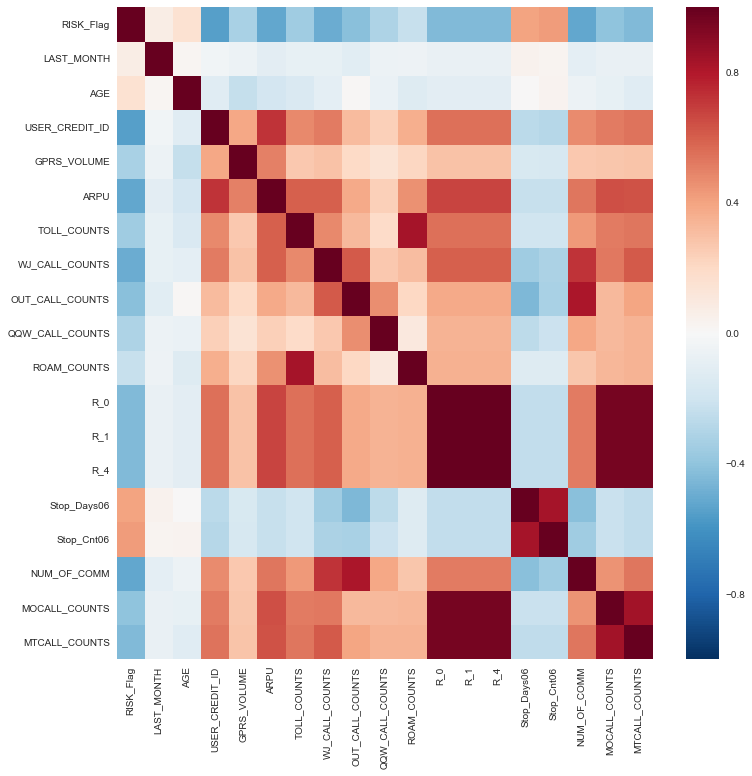

In [49]:
dfcorr=df.corr()
plt.figure(figsize=(12,12))
sns.heatmap(dfcorr)
plt.show()

In [50]:
dfcorr.RISK_Flag.sort_values()

USER_CREDIT_ID    -0.554196
ARPU              -0.517463
NUM_OF_COMM       -0.516655
WJ_CALL_COUNTS    -0.497640
R_4               -0.441883
R_1               -0.441883
R_0               -0.441883
MTCALL_COUNTS     -0.439205
OUT_CALL_COUNTS   -0.418421
MOCALL_COUNTS     -0.404998
TOLL_COUNTS       -0.352111
GPRS_VOLUME       -0.320935
QQW_CALL_COUNTS   -0.306219
ROAM_COUNTS       -0.226849
LAST_MONTH         0.076541
AGE                0.154232
Stop_Days06        0.402137
Stop_Cnt06         0.423725
RISK_Flag          1.000000
Name: RISK_Flag, dtype: float64

In [51]:
df.describe()

,RISK_Flag,LAST_MONTH,AGE,USER_CREDIT_ID,GPRS_VOLUME,ARPU,TOLL_COUNTS,WJ_CALL_COUNTS,OUT_CALL_COUNTS,QQW_CALL_COUNTS,ROAM_COUNTS,R_0,R_1,R_4,Stop_Days06,Stop_Cnt06,NUM_OF_COMM,MOCALL_COUNTS,MTCALL_COUNTS
count,28007.000000,28007.000000,28007.000000,28007.000000,28007.000000,28007.000000,28007.000000,28007.000000,28007.000000,28007.000000,28007.000000,28007.000000,28007.000000,28007.000000,28007.000000,28007.000000,28007.000000,28007.000000,28007.000000
mean,0.500018,17.641482,4.411076,4.277324,0.529046,2.185168,2.229086,4.993430,7.511658,4.369301,1.502624,207.084407,207.084407,207.084407,1.384475,1.217803,3.964687,93.393830,113.791981
std,0.500009,14.115910,1.048872,0.455592,1.193727,1.201889,2.831267,3.240832,2.607374,3.809576,2.564595,248.956595,248.956595,248.956595,0.823232,0.427046,1.117021,130.825052,128.200456
min,0.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,8.000000,4.000000,4.000000,0.000000,1.000000,0.000000,2.000000,7.000000,0.000000,0.000000,57.000000,57.000000,57.000000,1.000000,1.000000,3.000000,20.000000,34.000000
50%,1.000000,14.000000,4.000000,4.000000,0.000000,2.000000,1.000000,5.000000,9.000000,4.000000,0.000000,126.000000,126.000000,126.000000,1.000000,1.000000,4.000000,52.000000,74.000000
75%,1.000000,24.000000,5.000000,5.000000,1.000000,3.000000,3.000000,9.000000,9.000000,9.000000,2.000000,259.000000,259.000000,259.000000,1.000000,1.000000,5.000000,112.000000,147.000000
max,1.000000,146.000000,8.000000,5.000000,10.000000,5.000000,9.000000,9.000000,9.000000,9.000000,9.000000,2835.000000,2835.000000,2835.000000,4.000000,4.000000,5.000000,1847.000000,1624.000000


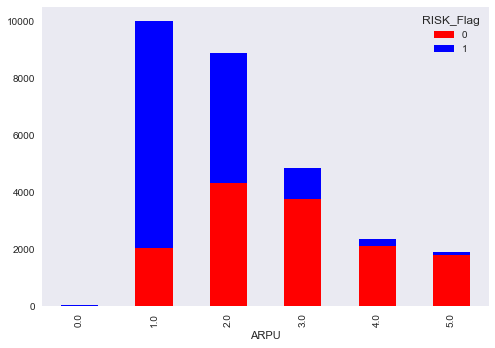

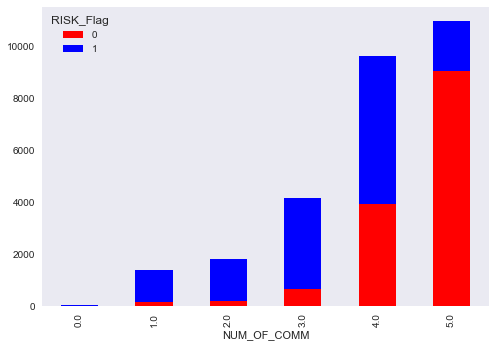

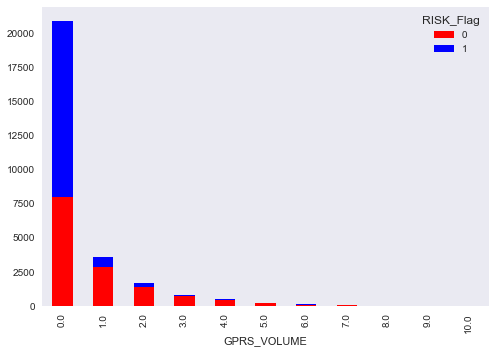

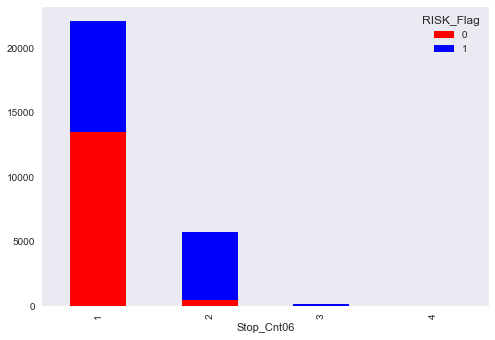

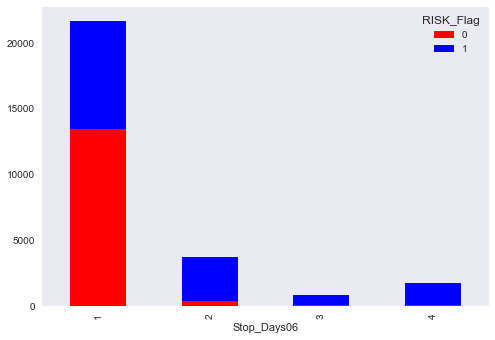

In [52]:
temp1=pd.crosstab(round(df.ARPU), df.RISK_Flag)
temp1.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

temp2=pd.crosstab(round(df.NUM_OF_COMM), df.RISK_Flag)
temp2.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

temp3=pd.crosstab(round(df.GPRS_VOLUME), df.RISK_Flag)
temp3.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

temp5=pd.crosstab(df.Stop_Cnt06, df.RISK_Flag)
temp5.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

temp6=pd.crosstab(df.Stop_Days06, df.RISK_Flag)
temp6.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)
plt.show()

In [53]:
print(temp1)
print(temp2)
print(temp3)
print(temp5)

RISK_Flag     0     1
ARPU                 
0.0           4    12
1.0        2032  7984
2.0        4308  4580
3.0        3772  1072
4.0        2091   248
5.0        1796   108
RISK_Flag       0     1
NUM_OF_COMM            
0.0             0    16
1.0           156  1208
2.0           180  1644
3.0           656  3512
4.0          3940  5712
5.0          9071  1912
RISK_Flag       0      1
GPRS_VOLUME             
0.0          7996  12876
1.0          2880    704
2.0          1436    228
3.0           779     68
4.0           428     64
5.0           208     16
6.0           116     16
7.0            96     16
8.0            28      8
9.0            20      8
10.0           16      0
RISK_Flag       0     1
Stop_Cnt06             
1           13499  8572
2             492  5284
3              12   144
4               0     4


#  6 数据建模

## 6.1 测试验证集

In [54]:
X_train,X_test,y_train,y_test=train_test_split(df.drop('RISK_Flag',1),df.RISK_Flag,test_size=0.25)

In [55]:
print(X_train.shape,y_train.shape, X_test.shape, y_test.shape)

(21005, 18) (21005,) (7002, 18) (7002,)


## 6.2 模型训练验证

In [56]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier,ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,auc
from sklearn.grid_search import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import cohen_kappa_score
from sklearn import cross_validation, metrics
from pprint import pprint
from sklearn import tree
import xgboost as xgb

/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/anaconda/lib/python3.6/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


### 模型：决策树

In [57]:
clf_tree=DecisionTreeClassifier()
clf_tree.fit(X_train,y_train)
score_tree=cross_val_score(clf_tree,X_test,y_test,cv=10).mean()
clf_tree.feature_importances_
y_pred_tree=clf_tree.predict(X_test)
ck_tree=cohen_kappa_score(y_test, y_pred_tree)
print(score_tree)
print(classification_report(y_test, y_pred_tree))
print(ck_tree)

0.866753765095
             precision    recall  f1-score   support

          0       0.99      0.99      0.99      3549
          1       0.99      0.99      0.99      3453

avg / total       0.99      0.99      0.99      7002

0.975430586548


In [58]:
error_count_tree = sum(y_test != (y_pred_tree))
error_rate_tree = float(error_count_tree) / len(y_pred_tree)
fpr_tree, tpr_tree, thresholds_tree = metrics.roc_curve(y_test, y_pred_tree)
auc_tree=metrics.auc(fpr_tree, tpr_tree)

print("样本总数：\t", len(y_pred_tree))
print("错误数目：\t%4d" % error_count_tree)
print("错误率：\t%.2f%%" % (100 * error_rate_tree))
print("精准度：\t%.2f%%" % (100 * (1-error_rate_tree)))
print("AUC：\t%.2f%%" % (100 * auc_tree))

样本总数：	 7002
错误数目：	  86
错误率：	1.23%
精准度：	98.77%
AUC：	98.77%


In [59]:
#with open("dt2.dot", 'w') as f:
#    dot_data = tree.export_graphviz(clf_tree, out_file=f, 
#                     feature_names=X_train.columns,  
#                     class_names="RISK",  
#                     filled=True, rounded=True,  
#                     special_characters=True)  

### 模型：随机森林

In [60]:
#==GRID SEARCH 1 FOR RANDFOREST:

#parameters1 = {'n_estimators':[750, 760, 770, 780, 790, 800, 810, 820, 830, 840, 850, 860, 870, 880, 890, 900]}
#grid_search = GridSearchCV(estimator=RandomForestClassifier(min_samples_split=100,min_samples_leaf=20,max_depth=8,max_features='sqrt' ,random_state=10),param_grid=parameters1, cv=5, scoring='roc_auc')

#grid_search.fit(X_train,y_train)
#grid_search.grid_scores_, grid_search.best_params_, grid_search.best_score_

#([mean: 0.91561, std: 0.00299, params: {'n_estimators': 750},
#  mean: 0.91563, std: 0.00298, params: {'n_estimators': 760},
#  mean: 0.91562, std: 0.00299, params: {'n_estimators': 770},
#  mean: 0.91563, std: 0.00299, params: {'n_estimators': 780},
#  mean: 0.91563, std: 0.00299, params: {'n_estimators': 790},
#  mean: 0.91564, std: 0.00298, params: {'n_estimators': 800},
#  mean: 0.91564, std: 0.00298, params: {'n_estimators': 810},
#  mean: 0.91563, std: 0.00298, params: {'n_estimators': 820},
#  mean: 0.91562, std: 0.00297, params: {'n_estimators': 830},
#  mean: 0.91561, std: 0.00297, params: {'n_estimators': 840},
#  mean: 0.91560, std: 0.00296, params: {'n_estimators': 850},
#  mean: 0.91560, std: 0.00297, params: {'n_estimators': 860},
#  mean: 0.91561, std: 0.00298, params: {'n_estimators': 870},
#  mean: 0.91560, std: 0.00298, params: {'n_estimators': 880},
#  mean: 0.91559, std: 0.00299, params: {'n_estimators': 890},
#  mean: 0.91560, std: 0.00298, params: {'n_estimators': 900}],
# {'n_estimators': 800},
# 0.9156393405184282)

In [61]:
#==GRID SEARCH 2 FOR RANDFOREST:

#parameters2 = {'max_depth':[3,5,7,9,11,13], 'min_samples_split':[50,70,90,110,130,150,170,190,210]}
#grid_search = GridSearchCV(estimator=RandomForestClassifier(n_estimators= 800,max_features='sqrt' ,random_state=10),param_grid=parameters2, cv=5, scoring='roc_auc')

#grid_search.fit(X_train,y_train)
#grid_search.grid_scores_, grid_search.best_params_, grid_search.best_score_

In [62]:
#==GRID SEARCH 3 FOR RANDFOREST:

#param_test3 = {'max_features':[3,5,7,9,11,13],'min_samples_leaf':[10,20,30,40,50]}
#grid_search = GridSearchCV(estimator = RandomForestClassifier(n_estimators= 800, max_depth=13,min_samples_split=50 ,oob_score=True, random_state=10),param_grid = param_test3, scoring='roc_auc',iid=False, cv=5)
#grid_search.fit(X_train,y_train)
#grid_search.grid_scores_, grid_search.best_params_, grid_search.best_score_

In [63]:
#clf_rf=RandomForestClassifier(n_estimators=1000, max_depth=13,min_samples_split=50 ,oob_score=True, random_state=10,max_features=13,min_samples_leaf=10)
clf_rf=RandomForestClassifier(n_estimators= 1000,max_features=5)
clf_rf.fit(X_train,y_train)
score_rf=cross_val_score(clf_rf,X_test,y_test,cv=10).mean()
y_pred_rf=clf_rf.predict(X_test)
ck_rf=cohen_kappa_score(y_test, y_pred_rf)
print(score_rf)
print(classification_report(y_test, y_pred_rf))
print(ck_rf)

0.908311553697
             precision    recall  f1-score   support

          0       0.99      1.00      1.00      3549
          1       1.00      0.99      1.00      3453

avg / total       1.00      1.00      1.00      7002

0.990286434866


In [64]:
error_count_rf = sum(y_test != (y_pred_rf))
error_rate_rf = float(error_count_rf) / len(y_pred_rf)
fpr_rf, tpr_rf, thresholds_rf = metrics.roc_curve(y_test, y_pred_rf)
auc_rf=metrics.auc(fpr_rf, tpr_rf)

print("样本总数：\t", len(y_pred_rf))
print("错误数目：\t%4d" % error_count_rf)
print("错误率：\t%.2f%%" % (100 * error_rate_rf))
print("精准度：\t%.2f%%" % (100 * (1-error_rate_rf)))
print("AUC：\t%.2f%%" % (100 * auc_rf))

样本总数：	 7002
错误数目：	  34
错误率：	0.49%
精准度：	99.51%
AUC：	99.51%


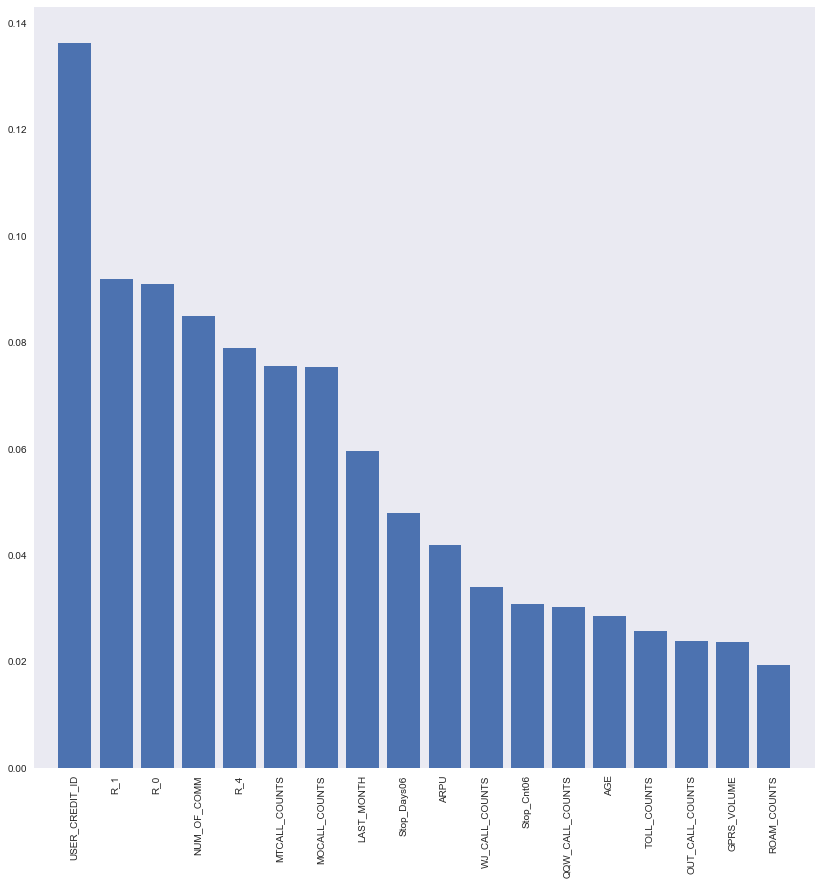

             factor    weight
0    USER_CREDIT_ID  0.136250
1               R_1  0.091851
2               R_0  0.091042
3       NUM_OF_COMM  0.084978
4               R_4  0.078876
5     MTCALL_COUNTS  0.075555
6     MOCALL_COUNTS  0.075427
7        LAST_MONTH  0.059518
8       Stop_Days06  0.048012
9              ARPU  0.041868
10   WJ_CALL_COUNTS  0.033976
11       Stop_Cnt06  0.030930
12  QQW_CALL_COUNTS  0.030367
13              AGE  0.028516
14      TOLL_COUNTS  0.025776
15  OUT_CALL_COUNTS  0.023927
16      GPRS_VOLUME  0.023680
17      ROAM_COUNTS  0.019452


In [65]:
importances = clf_rf.feature_importances_
#features = df.columns[1:]
features=df.drop('RISK_Flag',1).columns
sort_indices = np.argsort(importances)[::-1]
sorted_features = []
for idx in sort_indices:
    sorted_features.append(features[idx])
plt.figure()
plt.figure(figsize=(14,14))
plt.bar(range(len(importances)), importances[sort_indices], align='center');
plt.xticks(range(len(importances)), sorted_features, rotation='vertical');
plt.xlim([-1, len(importances)])
plt.grid(False)
plt.show()

result=pd.DataFrame({'factor':sorted_features,'weight':importances[sort_indices]})
print(result)

## 模型：支持向量机

In [66]:
clf_svm=SVC(C=1)
clf_svm.fit(X_train,y_train)
score_svm=cross_val_score(clf_svm,X_test,y_test,cv=10).mean()
print(score_svm)
y_pred_svm=clf_svm.predict(X_test)
ck_svm=cohen_kappa_score(y_test, y_pred_svm)
print(classification_report(y_test, y_pred_svm))
print(ck_svm)

0.828191282315
             precision    recall  f1-score   support

          0       0.97      0.98      0.98      3549
          1       0.98      0.96      0.97      3453

avg / total       0.97      0.97      0.97      7002

0.949419841104


In [67]:
error_count_svm = sum(y_test != (y_pred_svm))
error_rate_svm = float(error_count_svm) / len(y_pred_svm)
fpr_svm, tpr_svm, thresholds_svm = metrics.roc_curve(y_test, y_pred_svm)
auc_svm=metrics.auc(fpr_svm, tpr_svm)

print("样本总数：\t", len(y_pred_svm))
print("错误数目：\t%4d" % error_count_svm)
print("错误率：\t%.2f%%" % (100 * error_rate_svm))
print("精准度：\t%.2f%%" % (100 * (1-error_rate_svm)))
print("AUC：\t%.2f%%" % (100 * auc_svm))

样本总数：	 7002
错误数目：	 177
错误率：	2.53%
精准度：	97.47%
AUC：	97.46%


In [68]:
#clf_svm=SVC()
#parameters = {'C': [0.0001, 1]}
#grid_search = GridSearchCV(estimator=clf_svm,param_grid=parameters, cv=10, scoring='accuracy')

#print("parameters:")
#pprint(parameters)
#grid_search.fit(X_train,y_train)
#print("Best score: %0.3f" % grid_search.best_score_)
#print("Best parameters set:")
#best_parameters=grid_search.best_estimator_.get_params()
#for param_name in sorted(parameters.keys()):
#    print("\t%s: %r" % (param_name, best_parameters[param_name]))

## 模型：Ada Boost

In [69]:
clf_ada=AdaBoostClassifier()
clf_ada.fit(X_train,y_train)
score_ada=cross_val_score(clf_ada,X_test,y_test,cv=10).mean()
print(score_ada)
clf_ada.feature_importances_
y_pred_ada=clf_ada.predict(X_test)
ck_ada=cohen_kappa_score(y_test, y_pred_ada)
print(classification_report(y_test, y_pred_ada))
print(ck_ada)

0.817624336551
             precision    recall  f1-score   support

          0       0.84      0.81      0.82      3549
          1       0.81      0.84      0.83      3453

avg / total       0.83      0.82      0.82      7002

0.649924014185


In [70]:
error_count_ada = sum(y_test != (y_pred_ada))
error_rate_ada = float(error_count_ada) / len(y_pred_ada)
fpr_ada, tpr_ada, thresholds_ada = metrics.roc_curve(y_test, y_pred_ada)
auc_ada=metrics.auc(fpr_ada, tpr_ada)

print("样本总数：\t", len(y_pred_ada))
print("错误数目：\t%4d" % error_count_ada)
print("错误率：\t%.2f%%" % (100 * error_rate_ada))
print("精准度：\t%.2f%%" % (100 * (1-error_rate_ada)))
print("AUC：\t%.2f%%" % (100 * auc_ada))

样本总数：	 7002
错误数目：	1226
错误率：	17.51%
精准度：	82.49%
AUC：	82.51%


## 模型：朴素贝叶斯

In [71]:
clf_nb=GaussianNB()
clf_nb.fit(X_train,y_train)
score_nb=cross_val_score(clf_nb,X_test,y_test,cv=10).mean()
print(score_nb)
y_pred_nb=clf_tree.predict(X_test)
ck_nb=cohen_kappa_score(y_test, y_pred_nb)
print(classification_report(y_test, y_pred_nb))
print(ck_nb)

0.798484117606
             precision    recall  f1-score   support

          0       0.99      0.99      0.99      3549
          1       0.99      0.99      0.99      3453

avg / total       0.99      0.99      0.99      7002

0.975430586548


In [72]:
error_count_nb = sum(y_test != (y_pred_nb))
error_rate_nb = float(error_count_nb) / len(y_pred_nb)
fpr_nb, tpr_nb, thresholds_nb = metrics.roc_curve(y_test, y_pred_nb)
auc_nb=metrics.auc(fpr_nb, tpr_nb)

print("样本总数：\t", len(y_pred_nb))
print("错误数目：\t%4d" % error_count_nb)
print("错误率：\t%.2f%%" % (100 * error_rate_nb))
print("精准度：\t%.2f%%" % (100 * (1-error_rate_nb)))
print("AUC：\t%.2f%%" % (100 * auc_nb))

样本总数：	 7002
错误数目：	  86
错误率：	1.23%
精准度：	98.77%
AUC：	98.77%


## 模型：GBDT(Gradient Boosting Decision Tree) Classifier  

In [73]:
clf_gbdt=GradientBoostingClassifier(n_estimators=300)
clf_gbdt.fit(X_train,y_train)
score_gbdt=cross_val_score(clf_gbdt,X_test,y_test,cv=10).mean()
print(score_gbdt)
y_pred_gbdt=clf_gbdt.predict(X_test)
ck_gbdt=cohen_kappa_score(y_test, y_pred_gbdt)
print(classification_report(y_test, y_pred_gbdt))
print(ck_gbdt)

0.839190681439
             precision    recall  f1-score   support

          0       0.88      0.82      0.85      3549
          1       0.83      0.88      0.86      3453

avg / total       0.86      0.85      0.85      7002

0.707995602229


In [74]:
error_count_gbdt = sum(y_test != (y_pred_gbdt))
error_rate_gbdt = float(error_count_gbdt) / len(y_pred_gbdt)
fpr_gbdt, tpr_gbdt, thresholds_gbdt = metrics.roc_curve(y_test, y_pred_gbdt)
auc_gbdt=metrics.auc(fpr_gbdt, tpr_gbdt)

print("样本总数：\t", len(y_pred_gbdt))
print("错误数目：\t%4d" % error_count_gbdt)
print("错误率：\t%.2f%%" % (100 * error_rate_gbdt))
print("精准度：\t%.2f%%" % (100 * (1-error_rate_gbdt)))
print("AUC：\t%.2f%%" % (100 * auc_gbdt))

样本总数：	 7002
错误数目：	1023
错误率：	14.61%
精准度：	85.39%
AUC：	85.43%


## 模型：KNN

In [75]:
clf_knn=KNeighborsClassifier(n_neighbors=10)
clf_knn.fit(X_train,y_train)
score_knn=cross_val_score(clf_knn,X_test,y_test,cv=10).mean()
print(score_knn)
y_pred_knn=clf_knn.predict(X_test)
ck_knn=cohen_kappa_score(y_test, y_pred_knn)
print(classification_report(y_test, y_pred_knn))
print(ck_knn)

0.759494086431
             precision    recall  f1-score   support

          0       0.78      0.81      0.80      3549
          1       0.80      0.77      0.79      3453

avg / total       0.79      0.79      0.79      7002

0.584674824816


In [76]:
error_count_knn = sum(y_test != (y_pred_knn))
error_rate_knn = float(error_count_knn) / len(y_pred_knn)
fpr_knn, tpr_knn, thresholds_knn = metrics.roc_curve(y_test, y_pred_knn)
auc_knn=metrics.auc(fpr_knn, tpr_knn)

print("样本总数：\t", len(y_pred_knn))
print("错误数目：\t%4d" % error_count_knn)
print("错误率：\t%.2f%%" % (100 * error_rate_knn))
print("精准度：\t%.2f%%" % (100 * (1-error_rate_knn)))
print("AUC：\t%.2f%%" % (100 * auc_knn))

样本总数：	 7002
错误数目：	1453
错误率：	20.75%
精准度：	79.25%
AUC：	79.22%


### knn模型结果可视化

In [77]:
#from sklearn.manifold import TSNE

In [78]:
#tsne=TSNE()
#tsne.fit_transform(X_test)  #进行数据降维,降成两维
#tsne=pd.DataFrame(tsne.embedding_,index=y_test)
#d0=tsne.loc[y_pred_knn==0]
#d1=tsne.loc[y_pred_knn==1]

In [79]:
#plt.scatter(d0[0],d0[1],c='red')
#plt.scatter(d1[0],d1[1],c='blue')
#plt.show()

## 模型：逻辑回归

In [80]:
clf_log=LogisticRegression(C=0.1)
clf_log.fit(X_train,y_train)
score_log=cross_val_score(clf_log,X_test,y_test,cv=10).mean()
print(score_log)
y_pred_log=clf_log.predict(X_test)
ck_log=cohen_kappa_score(y_test, y_pred_log)
print(classification_report(y_test, y_pred_log))
print(ck_log)

0.814196379993
             precision    recall  f1-score   support

          0       0.83      0.80      0.82      3549
          1       0.81      0.83      0.82      3453

avg / total       0.82      0.82      0.82      7002

0.635621176125


In [81]:
error_count_log = sum(y_test != (y_pred_log))
error_rate_log = float(error_count_log) / len(y_pred_log)
fpr_log, tpr_log, thresholds_log = metrics.roc_curve(y_test, y_pred_log)
auc_log=metrics.auc(fpr_log, tpr_log)

print("样本总数：\t", len(y_pred_log))
print("错误数目：\t%4d" % error_count_log)
print("错误率：\t%.2f%%" % (100 * error_rate_log))
print("精准度：\t%.2f%%" % (100 * (1-error_rate_log)))
print("AUC：\t%.2f%%" % (100 * auc_log))

样本总数：	 7002
错误数目：	1276
错误率：	18.22%
精准度：	81.78%
AUC：	81.79%


## 模型：多隐层神经网络

In [82]:
clf_nn = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=[20,20], random_state=1, activation='relu')
clf_nn.fit(X_test, y_test)
score_nn=cross_val_score(clf_nn,X_test,y_test,cv=10).mean()
print(score_nn)
y_pred_nn=clf_nn.predict(X_test)
print(classification_report(y_test, y_pred_nn))
ck_nn=cohen_kappa_score(y_test, y_pred_nn)
print(ck_nn)

0.797204726657
             precision    recall  f1-score   support

          0       0.77      0.83      0.80      3549
          1       0.81      0.74      0.78      3453

avg / total       0.79      0.79      0.79      7002

0.576709981048


In [83]:
error_count_nn = sum(y_test != (y_pred_nn))
error_rate_nn = float(error_count_nn) / len(y_pred_nn)
fpr_nn, tpr_nn, thresholds_nn = metrics.roc_curve(y_test, y_pred_nn)
auc_nn=metrics.auc(fpr_nn, tpr_nn)

print("样本总数：\t", len(y_pred_nn))
print("错误数目：\t%4d" % error_count_nn)
print("错误率：\t%.2f%%" % (100 * error_rate_nn))
print("精准度：\t%.2f%%" % (100 * (1-error_rate_nn)))
print("AUC：\t%.2f%%" % (100 * auc_nn))

样本总数：	 7002
错误数目：	1480
错误率：	21.14%
精准度：	78.86%
AUC：	78.80%


## 模型：xgboost

In [84]:
from sklearn.datasets import dump_svmlight_file
dump_svmlight_file(X_train, y_train, 'train.xgb')
dump_svmlight_file(X_test, y_test, 'test.xgb')

In [85]:
# 设置参数，参数的格式用map的形式存储
param = {'max_depth': 10,                  # 树的最大深度
         'eta': 1,                        # 一个防止过拟合的参数，默认0.3
         'silent': 1,                     # 打印信息的繁简指标，1表示简， 0表示繁
         'objective': 'binary:logistic'}  # 使用的模型，分类的数目
num_round = 500  # 迭代的次数

train = xgb.DMatrix('train.xgb')
test = xgb.DMatrix('test.xgb')

watchlist = [(test, 'eval'), (train, 'train')]# 看板，每次迭代都可以在控制台打印出训练集与测试集的损失

clf_xgb=xgb.train(param, train, num_round, evals=watchlist)
y_pred_xgb=clf_xgb.predict(test) # 做预测


[0]	eval-error:0.1501	train-error:0.128779
[1]	eval-error:0.128678	train-error:0.10507
[2]	eval-error:0.112539	train-error:0.086694
[3]	eval-error:0.099115	train-error:0.068793
[4]	eval-error:0.082976	train-error:0.050464
[5]	eval-error:0.072694	train-error:0.040229
[6]	eval-error:0.060697	train-error:0.031088
[7]	eval-error:0.044844	train-error:0.021662
[8]	eval-error:0.040274	train-error:0.018329
[9]	eval-error:0.036418	train-error:0.013235
[10]	eval-error:0.033847	train-error:0.011378
[11]	eval-error:0.027135	train-error:0.008189
[12]	eval-error:0.023422	train-error:0.005761
[13]	eval-error:0.02385	train-error:0.005522
[14]	eval-error:0.019851	train-error:0.003571
[15]	eval-error:0.018709	train-error:0.003237
[16]	eval-error:0.01571	train-error:0.001381
[17]	eval-error:0.012996	train-error:0.000762
[18]	eval-error:0.011425	train-error:0.000524
[19]	eval-error:0.012139	train-error:0.000524
[20]	eval-error:0.012282	train-error:0.000428
[21]	eval-error:0.013282	train-error:0.000476
[22

[177]	eval-error:0.007712	train-error:0.000143
[178]	eval-error:0.007712	train-error:0.000143
[179]	eval-error:0.007712	train-error:0.000143
[180]	eval-error:0.007712	train-error:0.000143
[181]	eval-error:0.007712	train-error:0.000143
[182]	eval-error:0.007712	train-error:0.000143
[183]	eval-error:0.007712	train-error:0.000143
[184]	eval-error:0.007712	train-error:0.000143
[185]	eval-error:0.007712	train-error:0.000143
[186]	eval-error:0.007712	train-error:0.000143
[187]	eval-error:0.007712	train-error:0.000143
[188]	eval-error:0.007712	train-error:0.000143
[189]	eval-error:0.007712	train-error:0.000143
[190]	eval-error:0.007712	train-error:0.000143
[191]	eval-error:0.007712	train-error:0.000143
[192]	eval-error:0.007712	train-error:0.000143
[193]	eval-error:0.007712	train-error:0.000143
[194]	eval-error:0.007712	train-error:0.000143
[195]	eval-error:0.007712	train-error:0.000143
[196]	eval-error:0.007712	train-error:0.000143
[197]	eval-error:0.007712	train-error:0.000143
[198]	eval-er

[352]	eval-error:0.007426	train-error:0.000143
[353]	eval-error:0.007426	train-error:0.000143
[354]	eval-error:0.007426	train-error:0.000143
[355]	eval-error:0.007141	train-error:0.000143
[356]	eval-error:0.007426	train-error:0.000143
[357]	eval-error:0.007284	train-error:0.000143
[358]	eval-error:0.007141	train-error:0.000143
[359]	eval-error:0.007141	train-error:0.000143
[360]	eval-error:0.007141	train-error:0.000143
[361]	eval-error:0.007141	train-error:0.000143
[362]	eval-error:0.007141	train-error:0.000143
[363]	eval-error:0.007141	train-error:0.000143
[364]	eval-error:0.007284	train-error:0.000143
[365]	eval-error:0.007284	train-error:0.000143
[366]	eval-error:0.007284	train-error:0.000143
[367]	eval-error:0.007284	train-error:0.000143
[368]	eval-error:0.007284	train-error:0.000143
[369]	eval-error:0.007141	train-error:0.000143
[370]	eval-error:0.007141	train-error:0.000143
[371]	eval-error:0.007141	train-error:0.000143
[372]	eval-error:0.007141	train-error:0.000143
[373]	eval-er

In [86]:
# 打印结果
print(y_pred_xgb)

error_xgboost = sum(y_test != (y_pred_xgb > 0.5))
error_xgboost_rate = float(error_xgboost) / len(y_pred_xgb)
score_xgboost='NA'
ck_xgboost='NA'
auc_xgboost='NA'
print("样本总数：\t", len(y_pred_xgb))
print("错误数目：\t%4d" % error_xgboost)
print("错误率：\t%.2f%%" % (100 * error_xgboost_rate))
print("精准度：\t%.2f%%" % (100 * (1-error_xgboost_rate)))

[  6.47331006e-04   9.99011278e-01   9.99371588e-01 ...,   8.66184950e-01
   1.66534982e-03   3.59699450e-04]
样本总数：	 7002
错误数目：	  50
错误率：	0.71%
精准度：	99.29%


## 模型：extremely random forest

In [87]:
clf_extree=ExtraTreesClassifier(n_estimators= 1000,max_features=5)
clf_extree.fit(X_train,y_train)
score_extree=cross_val_score(clf_extree,X_test,y_test,cv=10).mean()
y_pred_extree=clf_extree.predict(X_test)
ck_extree=cohen_kappa_score(y_test, y_pred_extree)
print(score_extree)
print(classification_report(y_test, y_pred_extree))
print(ck_extree)

0.912596865066
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      3549
          1       1.00      1.00      1.00      3453

avg / total       1.00      1.00      1.00      7002

0.992857644719


In [88]:
error_count_extree = sum(y_test != (y_pred_extree))
error_rate_extree = float(error_count_extree) / len(y_pred_extree)
fpr_extree, tpr_extree, thresholds_extree = metrics.roc_curve(y_test, y_pred_extree)
auc_extree=metrics.auc(fpr_extree, tpr_extree)

print("样本总数：\t", len(y_pred_extree))
print("错误数目：\t%4d" % error_count_extree)
print("错误率：\t%.2f%%" % (100 * error_rate_extree))
print("精准度：\t%.2f%%" % (100 * (1-error_rate_extree)))
print("AUC：\t%.2f%%" % (100 * auc_extree))

样本总数：	 7002
错误数目：	  25
错误率：	0.36%
精准度：	99.64%
AUC：	99.64%


# 7 模型评估

In [89]:
#result=pd.DataFrame({"0-Classifier":["Decision Tree","Random Forest","SVM","Ada boost","Gaussian NB","KNN","Log Regression","GBDT","Neural network","Extremely random forest"],"2-Accuracy":[score_tree,score_rf,score_svm,score_ada,score_nb,score_knn,score_log,score_gbdt,score_nn,score_extree],"4-kappa score":[ck_tree,ck_rf,ck_svm,ck_ada,ck_nb,ck_knn,ck_log,ck_gbdt,ck_nn,ck_extree],"1-AUC Score":[auc_tree,auc_rf,auc_svm,auc_ada,auc_nb,auc_knn,auc_log,auc_gbdt,auc_nn,auc_extree],"3-NUM of error examples":[error_count_tree,error_count_rf,error_count_svm,error_count_ada,error_count_nb,error_count_knn,error_count_log,error_count_gbdt,error_count_nn,error_count_extree]})
result=pd.DataFrame({"0-Classifier":["Decision Tree","Random Forest","SVM","Ada boost","Gaussian NB","KNN","Log Regression","GBDT","Neural network","Extremely random forest","xgboost"],"2-Accuracy":[score_tree,score_rf,score_svm,score_ada,score_nb,score_knn,score_log,score_gbdt,score_nn,score_extree,score_xgboost],"4-kappa score":[ck_tree,ck_rf,ck_svm,ck_ada,ck_nb,ck_knn,ck_log,ck_gbdt,ck_nn,ck_extree,ck_xgboost],"1-AUC Score":[auc_tree,auc_rf,auc_svm,auc_ada,auc_nb,auc_knn,auc_log,auc_gbdt,auc_nn,auc_extree,auc_xgboost],"3-NUM of error examples":[error_count_tree,error_count_rf,error_count_svm,error_count_ada,error_count_nb,error_count_knn,error_count_log,error_count_gbdt,error_count_nn,error_count_extree,error_xgboost]})
result.columns=['Classifier','AUC Score','CV Accuracy','NUM of error examples','Kappa Score']
result.sort_values("NUM of error examples",ascending=True)

,Classifier,AUC Score,CV Accuracy,NUM of error examples,Kappa Score
9,Extremely random forest,0.996415,0.912597,25,0.992858
1,Random Forest,0.995132,0.908312,34,0.990286
10,xgboost,NA,NA,50,NA
0,Decision Tree,0.987708,0.866754,86,0.975431
4,Gaussian NB,0.987708,0.798484,86,0.975431
2,SVM,0.974582,0.828191,177,0.94942
7,GBDT,0.854304,0.839191,1023,0.707996
3,Ada boost,0.825125,0.817624,1226,0.649924
6,Log Regression,0.817948,0.814196,1276,0.635621
5,KNN,0.792181,0.759494,1453,0.584675


In [90]:
end=time.time()

In [91]:
print("Using time(s): %.2f " %(end-start))

Using time(s): 513.50 


## 变量权重

In [92]:
from sklearn.feature_selection import RFE  
from sklearn.linear_model import LinearRegression  
    
#use linear regression as the model  
lr = LinearRegression()  
#rank all features, i.e continue the elimination until the last one  
rfe = RFE(lr, n_features_to_select=3)  
rfe.fit(X_train,y_train)  
  
print ("Features sorted by their rank:")  
dd=pd.DataFrame(sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), X_train.columns)))
dd

Features sorted by their rank:


,0,1
0,1,NUM_OF_COMM
1,1,Stop_Cnt06
2,1,USER_CREDIT_ID
3,2,ARPU
4,3,AGE
5,4,GPRS_VOLUME
6,5,WJ_CALL_COUNTS
7,6,QQW_CALL_COUNTS
8,7,Stop_Days06
9,8,ROAM_COUNTS


In [93]:
def save_tofile(content,filename='/Users/user/Downloads/datatech.log',mode='a'):
	file=open(filename,mode)
	filetime=time.strftime('%Y-%m-%d %H:%M:%S',time.localtime(time.time()))
	file.write(filetime+'\t'+str(content)+'\n')
	file.close()

In [94]:
result=pd.DataFrame({"0-Classifier":["Decision Tree","Random Forest","SVM","Ada boost","Gaussian NB","KNN","Log Regression","GBDT","Extremely random forest"],"2-Accuracy":[score_tree,score_rf,score_svm,score_ada,score_nb,score_knn,score_log,score_gbdt,score_extree],"4-kappa score":[ck_tree,ck_rf,ck_svm,ck_ada,ck_nb,ck_knn,ck_log,ck_gbdt,ck_extree],"1-AUC Score":[auc_tree,auc_rf,auc_svm,auc_ada,auc_nb,auc_knn,auc_log,auc_gbdt,auc_extree],"3-NUM of error examples":[error_count_tree,error_count_rf,error_count_svm,error_count_ada,error_count_nb,error_count_knn,error_count_log,error_count_gbdt,error_count_extree]})
result.columns=['Classifier','AUC Score','CV Accuracy','NUM of error examples','Kappa Score']
result.sort_values("NUM of error examples",ascending=True)

,Classifier,AUC Score,CV Accuracy,NUM of error examples,Kappa Score
8,Extremely random forest,0.996415,0.912597,25,0.992858
1,Random Forest,0.995132,0.908312,34,0.990286
0,Decision Tree,0.987708,0.866754,86,0.975431
4,Gaussian NB,0.987708,0.798484,86,0.975431
2,SVM,0.974582,0.828191,177,0.949420
7,GBDT,0.854304,0.839191,1023,0.707996
3,Ada boost,0.825125,0.817624,1226,0.649924
6,Log Regression,0.817948,0.814196,1276,0.635621
5,KNN,0.792181,0.759494,1453,0.584675


In [95]:
X_train.columns

Index(['LAST_MONTH', 'AGE', 'USER_CREDIT_ID', 'GPRS_VOLUME', 'ARPU',
       'TOLL_COUNTS', 'WJ_CALL_COUNTS', 'OUT_CALL_COUNTS', 'QQW_CALL_COUNTS',
       'ROAM_COUNTS', 'R_0', 'R_1', 'R_4', 'Stop_Days06', 'Stop_Cnt06',
       'NUM_OF_COMM', 'MOCALL_COUNTS', 'MTCALL_COUNTS'],
      dtype='object')

In [96]:
from sklearn.metrics import f1_score

In [97]:
f1_score(y_test,y_pred_knn)

0.7853449549416458

In [98]:
if clf_rf==clf_knn:
    print(1)
else:
    print(0)

0
